# Data Analysis Project
### Spring 2024
## Analyzing Insurance Auto Claims

<br>
<br>
<p align="center">
<img 
  src="./files/car_accident.png" 
  alt="Car Accident" 
  width="600"
  height="450"
/>
</p>

<br>

## Introduction
This semester we will be working with a dataset of auto claims filed by customers of an automobile insurance company located in the southwest and western regions of the United States.

Insurance companies depend on accurate pricing estimates to maintain profitability. Auto policies must be priced so that the insurance company makes a profit in the long run, given the costs of their customers' payouts for accident repairs, total loss car replacements, medical fees, and legal fees.

The executives at this insurance company have noticed declining profitability over the last several years and have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

The objective of this project is to perform an exploratory data analysis on the `claims_df` dataset and produce an executive summary of your key insights and recommendations to the executive team at the insurance company.

Before you begin, take a moment to read through the following insurance company terms to familiarize yourself with the industry: [Auto Insurance Terms](https://www.iii.org/article/auto-insurance-jargon-buster "Auto Insurance Terms")

## Auto Claims Data

The `claims_df` data frame is loaded below and consists of 6,249 auto claims submitted by customers of the insurance company. The rows in this data frame represent a single claim with all of the associated features that are displayed in the table below.

### Data Definitions

| Variable                	| Definition                                                  	| Data Type 	|
|:------------------------- |:------------------------------------------------------------- |:------------- |
| customer_id             	| Customer identifier                                         	| Character 	|
| customer_state          	| State of residence                                          	| Factor    	|
| highest_education       	| Highest level of education                                  	| Factor    	|
| employment_status       	| Employment status at time of claim                          	| Factor    	|
| gender                  	| Gender                                                      	| Factor    	|
| income                  	| Income (US Dollars)                                         	| Numeric   	|
| residence_type          	| Customer residence type                                     	| Factor    	|
| marital_status          	| Marital status                                              	| Factor    	|
| sales_channel           	| Customer acquisition method                                 	| Factor    	|
| coverage                	| Auto policy tier                                            	| Factor    	|
| policy                  	| Auto policy type                                            	| Factor    	|
| vehicle_class           	| Vehicle type                                                	| Factor    	|
| vehicle_size            	| Vehicle size                                                	| Factor    	|
| monthly_premium         	| Customer monthly premium                                    	| Numeric   	|
| months_policy_active    	| Number of months policy has been active                     	| Numeric   	|
| months_since_last_claim 	| Number of months since last claim                           	| Numeric   	|
| current_claim_amount    	| Current claim amount                                        	| Numeric   	|
| total_claims            	| Total number of claims in customer history                  	| Numeric   	|
| total_claims_amount     	| Total amount of all claims in customer history              	| Numeric   	|
| customer_lifetime_value 	| Customer lifetime value (total revenue - total claims cost) 	| Numeric   	|

In [5]:
# Load data
library(tidyverse)

claims_df <- readRDS(url('https://gmubusinessanalytics.netlify.app/data/claims_df.rds'))

In [6]:
# View data
claims_df

customer_id,customer_state,highest_education,employment_status,gender,income,residence_type,marital_status,sales_channel,coverage,policy,vehicle_class,vehicle_size,monthly_premium,months_policy_active,months_since_last_claim,current_claim_amount,total_claims,total_claims_amount,customer_lifetime_value
<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AA11235,Nevada,Bachelor,Medical Leave,Female,11167,Suburban,Married,Branch,Basic,Personal,Two-Door Car,Midsize,73,25,0,1383,1,1383,442
AA16582,Washington,Bachelor,Medical Leave,Male,14072,Suburban,Divorced,Agent,Basic,Personal,Four-Door Car,Midsize,71,27,13,1379,2,1992,-75
AA34092,California,Associate,Employed,Male,33635,Suburban,Married,Web,Extended,Personal,Luxury SUV,Midsize,240,32,1,2633,2,3671,4009
AA56476,Arizona,High School,Employed,Female,74454,Suburban,Single,Call Center,Basic,Corporate,Four-Door Car,Midsize,71,39,25,906,2,1541,1228
AA69265,Nevada,Bachelor,Employed,Female,60817,Suburban,Single,Web,Premium,Personal,Four-Door Car,Midsize,103,21,3,1095,2,1760,403
AA71604,Arizona,Master,Employed,Female,87560,Suburban,Married,Web,Extended,Personal,Two-Door Car,Midsize,98,17,4,1136,2,1828,-162
AA93585,California,Associate,Employed,Male,97024,Urban,Married,Branch,Premium,Personal,SUV,Midsize,177,33,0,1712,1,1712,4129
AB21519,California,Associate,Employed,Female,93272,Urban,Married,Branch,Extended,Personal,Four-Door Car,Midsize,95,26,3,1702,2,2585,-115
AB23825,California,Associate,Employed,Male,21509,Suburban,Single,Agent,Extended,Personal,Two-Door Car,Midsize,81,48,24,2058,2,3033,855


## Exploratory Data Analysis (80 Points)

Executives at this company have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

You must think of **at least 8 relevant questions** that will provide evidence for your recommendations.

The goal of your analysis should be discovering which variables drive the differences between customers with large lifetime values and customers who cost the company more than they provide in revenue through monthly premiums.

Some of the many questions you can explore include:

- Are there types of customers, based on their policy or demographics, that are highly profitable?
- Do certain policies have a lower number of claims, leading to large profits?
- Are there "problem customers" which have a large number of claims?

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 5 plots and 4 summary data frames for the exploratory data analysis section. Among the plots you produce, you must have at least 4 different types (ex. box plot, bar chart,
histogram, heat map, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

**Is there a relationship between employees leaving the company and their current salary?**

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1


**Question**:
Which demographics are associated by with higher customer lifetime value(CLV)?

**Answer**:

From below demographics we can understand that, female are having more average lifetime value than male by gender. And also, single have the most average customer lifetime value by marital status. People from Nevada have most average customer lifetinme valuefollowed a Arizona, Oregon, California and Washington.

## Supporting Analysis

In [7]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

In [7]:
library(dplyr)
library(ggplot2)

In [8]:
claims_df

customer_id,customer_state,highest_education,employment_status,gender,income,residence_type,marital_status,sales_channel,coverage,policy,vehicle_class,vehicle_size,monthly_premium,months_policy_active,months_since_last_claim,current_claim_amount,total_claims,total_claims_amount,customer_lifetime_value
<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AA11235,Nevada,Bachelor,Medical Leave,Female,11167,Suburban,Married,Branch,Basic,Personal,Two-Door Car,Midsize,73,25,0,1383,1,1383,442
AA16582,Washington,Bachelor,Medical Leave,Male,14072,Suburban,Divorced,Agent,Basic,Personal,Four-Door Car,Midsize,71,27,13,1379,2,1992,-75
AA34092,California,Associate,Employed,Male,33635,Suburban,Married,Web,Extended,Personal,Luxury SUV,Midsize,240,32,1,2633,2,3671,4009
AA56476,Arizona,High School,Employed,Female,74454,Suburban,Single,Call Center,Basic,Corporate,Four-Door Car,Midsize,71,39,25,906,2,1541,1228
AA69265,Nevada,Bachelor,Employed,Female,60817,Suburban,Single,Web,Premium,Personal,Four-Door Car,Midsize,103,21,3,1095,2,1760,403
AA71604,Arizona,Master,Employed,Female,87560,Suburban,Married,Web,Extended,Personal,Two-Door Car,Midsize,98,17,4,1136,2,1828,-162
AA93585,California,Associate,Employed,Male,97024,Urban,Married,Branch,Premium,Personal,SUV,Midsize,177,33,0,1712,1,1712,4129
AB21519,California,Associate,Employed,Female,93272,Urban,Married,Branch,Extended,Personal,Four-Door Car,Midsize,95,26,3,1702,2,2585,-115
AB23825,California,Associate,Employed,Male,21509,Suburban,Single,Agent,Extended,Personal,Two-Door Car,Midsize,81,48,24,2058,2,3033,855


In [9]:
#summarize average CLV by gender
groupGender<-claims_df %>%
group_by(gender) %>%
summarize(Average_CLV=mean(customer_lifetime_value,na.rm=TRUE))

#summarize average ClV by state of residence
groupState=claims_df %>%
group_by(customer_state) %>%
summarize(Average_CLV=mean(customer_lifetime_value,na.rm=TRUE))

#summmarize average CLV by martial status
groupMartial<-claims_df %>%
group_by(marital_status) %>%
  summarize(Average_CLV = mean(customer_lifetime_value, na.rm = TRUE))



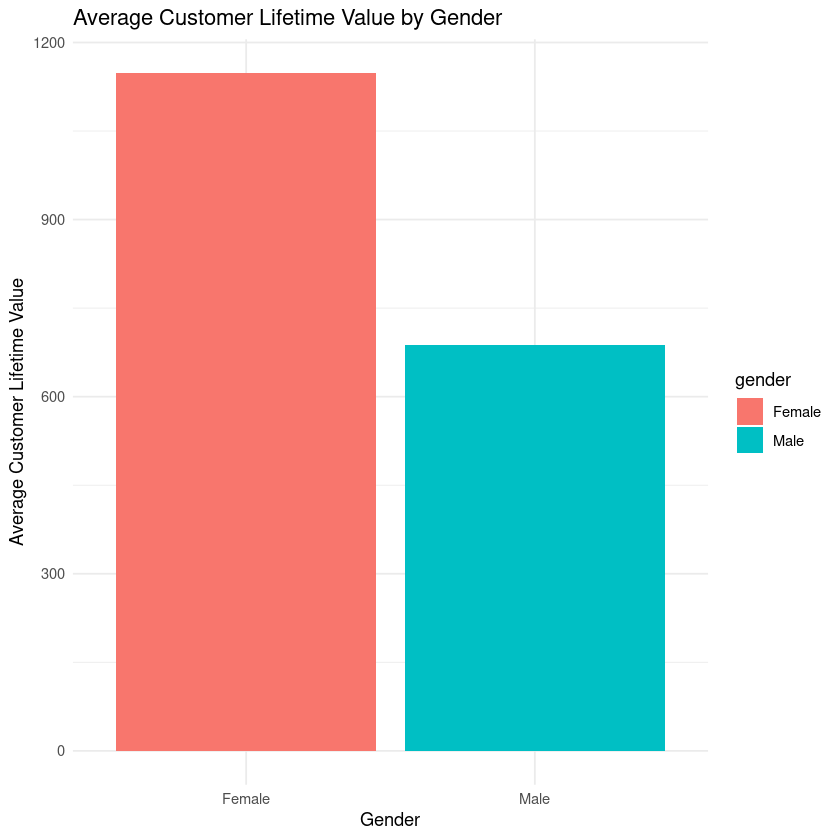

In [10]:
# Plot average CLV by gender
ggplot(groupGender, aes(x = gender, y = Average_CLV, fill = gender)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Average Customer Lifetime Value by Gender",
       x = "Gender",
       y = "Average Customer Lifetime Value")




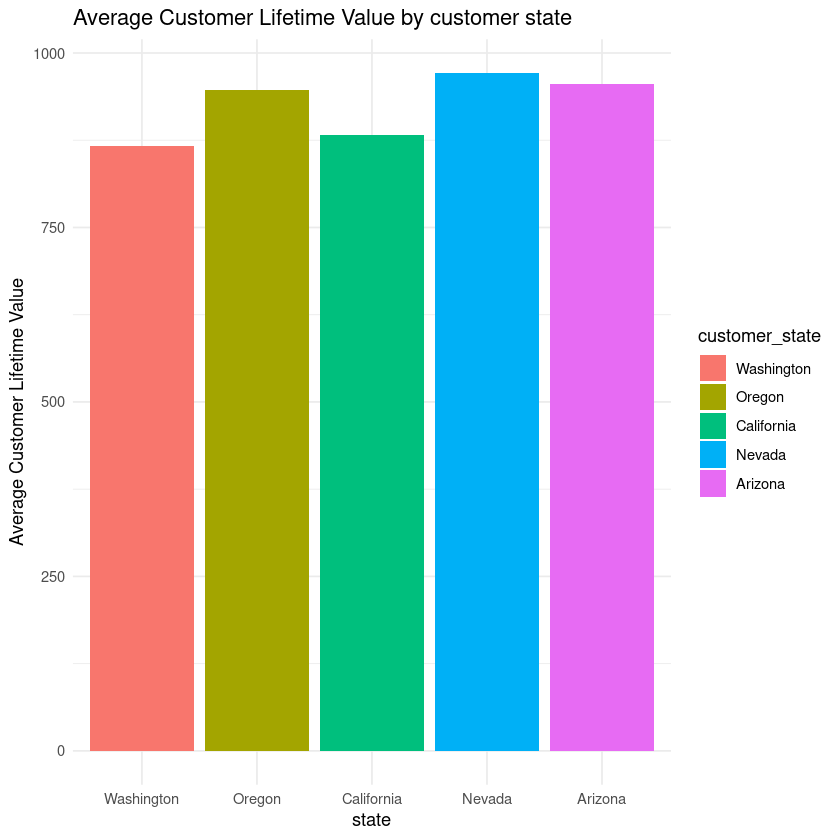

In [11]:
#plot average CLV by state of residency
ggplot(groupState, aes(x = customer_state, y = Average_CLV, fill = customer_state)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Average Customer Lifetime Value by customer state",
       x = "state",
       y = "Average Customer Lifetime Value")

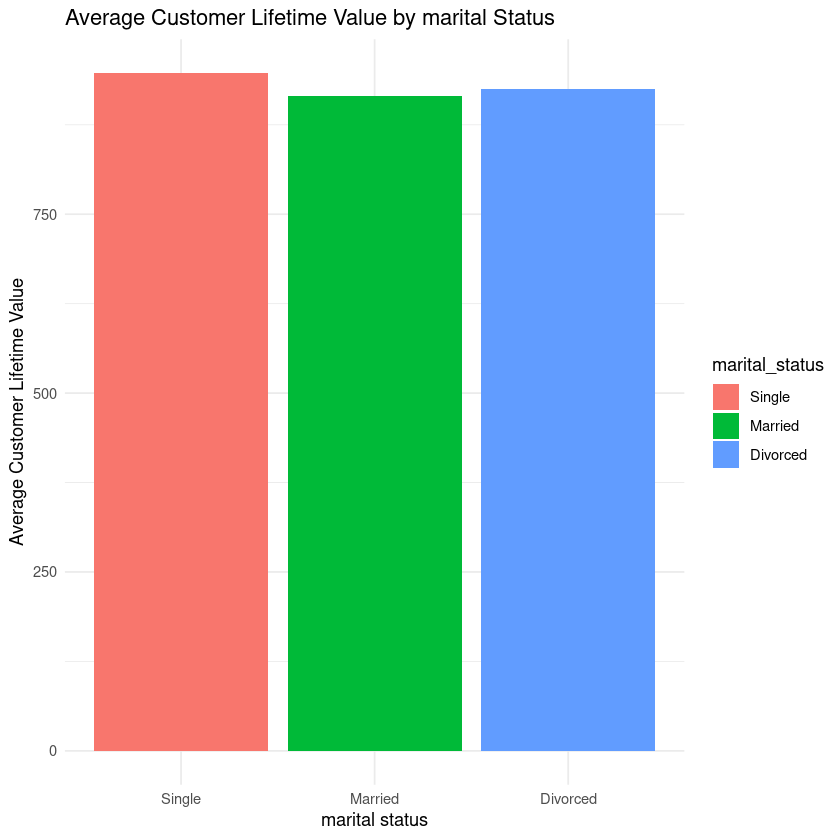

In [12]:
#plot average CLV by martial status
ggplot(groupMartial, aes(x = marital_status, y = Average_CLV, fill = marital_status)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Average Customer Lifetime Value by marital Status",
       x = "marital status",
       y = "Average Customer Lifetime Value")

## Question 2


**Question**:
Do certain auto policy types or tiers correlate with higher profitability?


**Answer**:
Corporate types are having more median across all tiers which seems to be more profitable followed by personal then special. Across all tiers premium tier has more profit.

## Supporting Analysis


In [13]:
policyPerformance<- claims_df %>%
group_by(policy,coverage)%>%
summarise(
Average_CLV=mean(customer_lifetime_value),
totalClaimsAmount=sum(current_claim_amount)
) 


`summarise()` has grouped output by 'policy'. You can override using the
`.groups` argument.


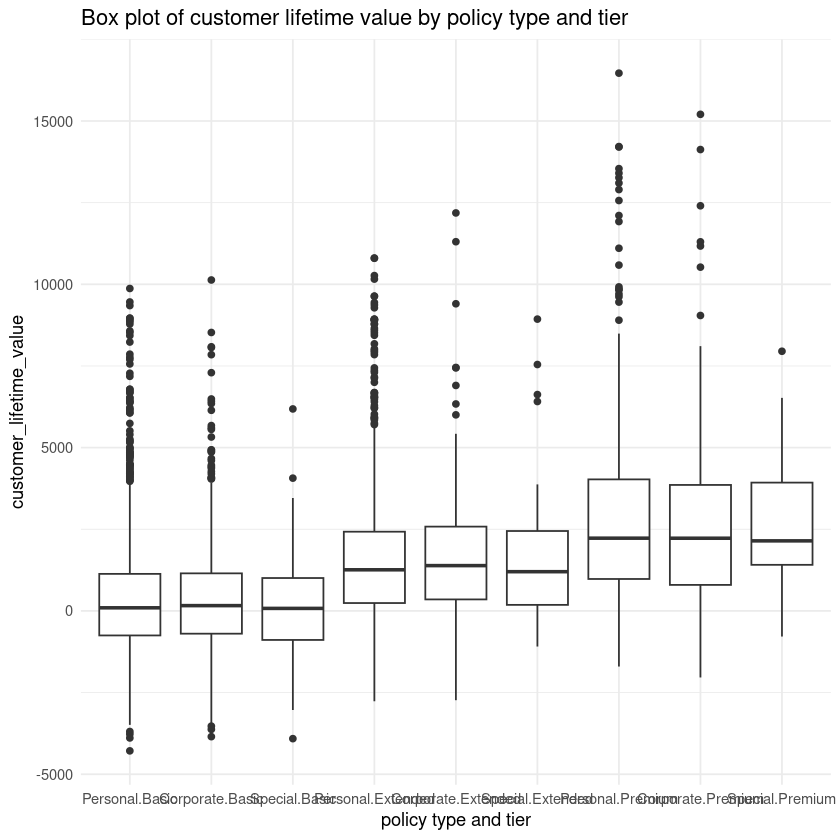

In [14]:
ggplot(claims_df, aes(x=interaction(policy,coverage),y=customer_lifetime_value))+
geom_boxplot()+
theme_minimal()+
labs(
title="Box plot of customer lifetime value by policy type and tier",
	x="policy type and tier"
)

## Question 3


**Question**:
Is there a relationship between the number of claims and the customer lifetime value?

**Answer**:
The blue line represents the regression line, which indicates the negative correlation, and if we obeserve, there are more no of claims at 2 and 3.

## Supporting Analysis


In [15]:
# Assuming your dataset is named insurance_data
correlation <- cor(claims_df$total_claims, claims_df$customer_lifetime_value)
correlation


[1] -0.2863264

`geom_smooth()` using formula = 'y ~ x'


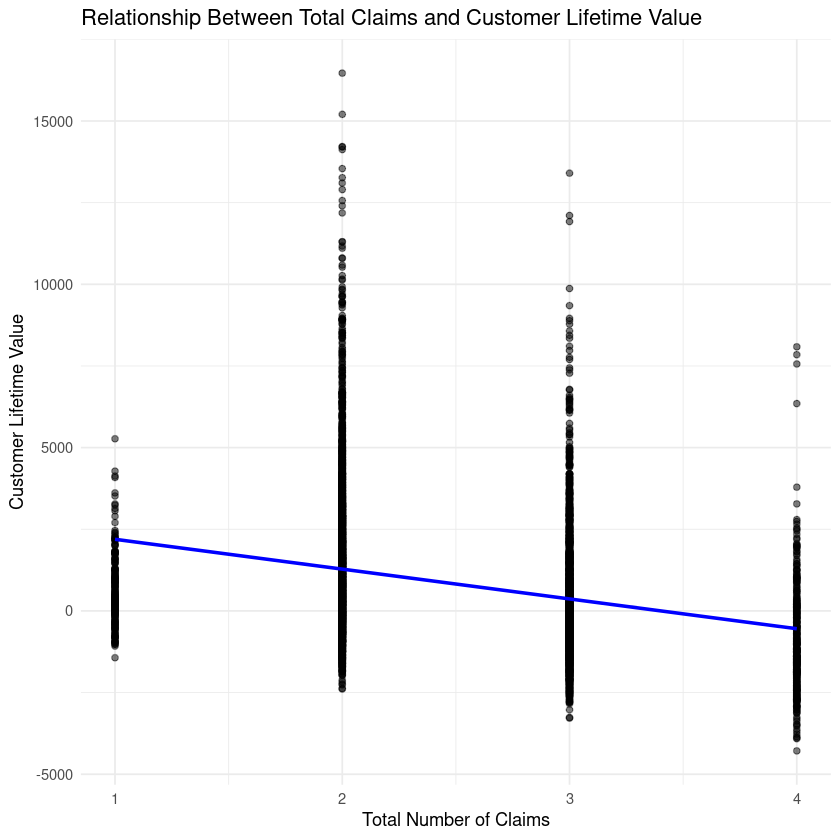

In [16]:


ggplot(claims_df, aes(x = total_claims, y = customer_lifetime_value)) +
  geom_point(alpha = 0.5) +  # Use semi-transparent points to handle overplotting
  geom_smooth(method = "lm", se = FALSE, color = "blue") +  # Add a linear regression line without the standard error
  theme_minimal() +
  labs(
    title = "Relationship Between Total Claims and Customer Lifetime Value",
    x = "Total Number of Claims",
    y = "Customer Lifetime Value"
  )


## Question 4


**Question**:
How does customer income affect the choice of monthly premium and policy tier?


**Answer**:
Personal Policy Tier: This tier has the highest count across all income quartiles, as indicated by the darkest color. It suggests that the personal policy tier is the most common choice among customers, regardless of their income level.

Corporate Policy Tier: There is a significant count of corporate policy holders in the lower income quartiles, with the color being darkest in the 1st quartile and getting lighter towards the 4th quartile. This might indicate that corporate policies are more commonly chosen by customers in the lower income brackets, which could be due to business owners or professionals who may not necessarily have high personal incomes.

Special Policy Tier: The special policy tier has the lowest count, indicated by the lightest color across all income quartiles. This suggests that special policies are less common among customers of all income levels.

Income Effect: The choice of policy tier does not seem to vary dramatically with income since the most significant change in count color intensity is within the corporate tier from the 1st to the 4th quartile. However, without exact numbers or further context, it's hard to determine the strength of this effect.

## Supporting Analysis


In [17]:
quartile <- claims_df %>%
  mutate(income_quartile = ntile(income, 4))

# Summarize average monthly premium by income quartile
incomeLevel<- quartile %>%
group_by(income_quartile) %>%
  summarise(
    Average_Monthly_Premium = mean(monthly_premium)
  )

# Find the most common policy tier within each income quartile
common_policy_tier <- quartile %>%
  group_by(income_quartile, policy) %>%
  summarise(
    Count = n(),
    .groups = 'drop' # This will remove the grouping structure after summarisation
  ) %>%
  arrange(desc(Count)) %>%
  mutate(rank = row_number()) %>%
  filter(rank == 1)


In [18]:
count_matrix<- quartile%>%
count(income_quartile,policy)


In [19]:
count_matrix

income_quartile,policy,n
<int>,<fct>,<int>
1,Personal,1179
1,Corporate,323
1,Special,61
2,Personal,1159
2,Corporate,332
2,Special,71
3,Personal,1170
3,Corporate,336
3,Special,56


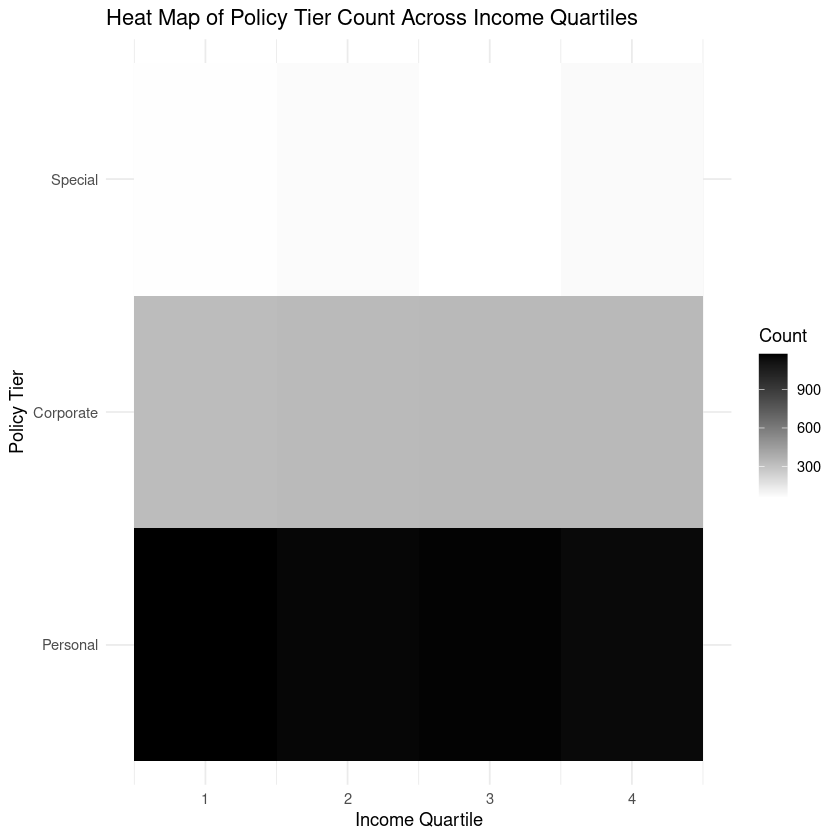

In [20]:
# Plot a heat map
ggplot(count_matrix, aes(x = income_quartile, y = policy, fill = n)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "black") +
  labs(
    title = "Heat Map of Policy Tier Count Across Income Quartiles",
    x = "Income Quartile",
    y = "Policy Tier",
    fill = "Count"
  ) +
  theme_minimal()

## Question 5


**Question**:

Are certain vehicle classes or sizes associated with higher claims amounts or more frequent claims?

**Answer**:

**Claims Frequency by Vehicle Class and Size:**

The bar chart shows that four-door cars, particularly midsize and large ones, have the highest claims frequency. This suggests that four-door cars are more likely to be involved in claims than two-door cars, sports cars, SUVs, luxury cars, and luxury SUVs.
Sports cars, particularly small ones, also have a higher frequency of claims compared to two-door cars and luxury vehicles. luxury SUVs, across all sizes, appear to have a lower frequency of claims.

**Claims Amount by Vehicle Class and Size:**
The box plot indicates that sports cars have a wide range of claims amounts, with the median claims amount being higher than two-door cars but lower or comparable to four-door cars and SUVs. This variability suggests that sports cars can be involved in claims with high amounts, although not consistently so across all cases.
Four-door cars show a higher median claims amount than two-door cars, especially for midsize and large vehicle sizes.



## Supporting Analysis


In [21]:


# Summarize average claims amount by vehicle class and size
claims_summary <- claims_df %>%
  group_by(vehicle_class, vehicle_size) %>%
  summarise(
    Average_Claims_Amount = mean(current_claim_amount),
    Claims_Frequency = n()
  )


`summarise()` has grouped output by 'vehicle_class'. You can override using the
`.groups` argument.


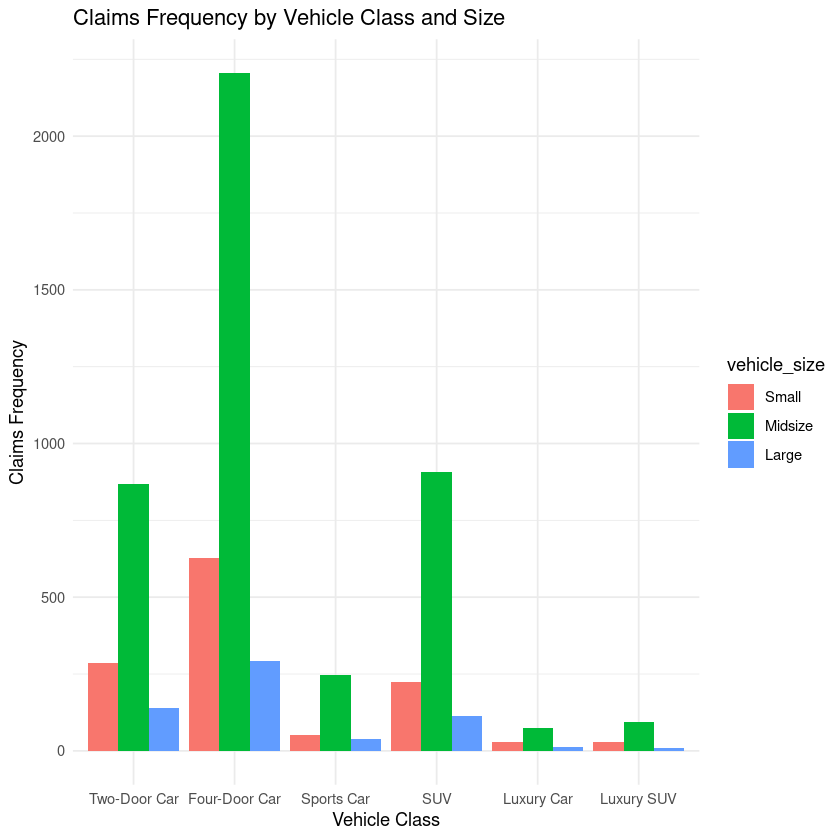

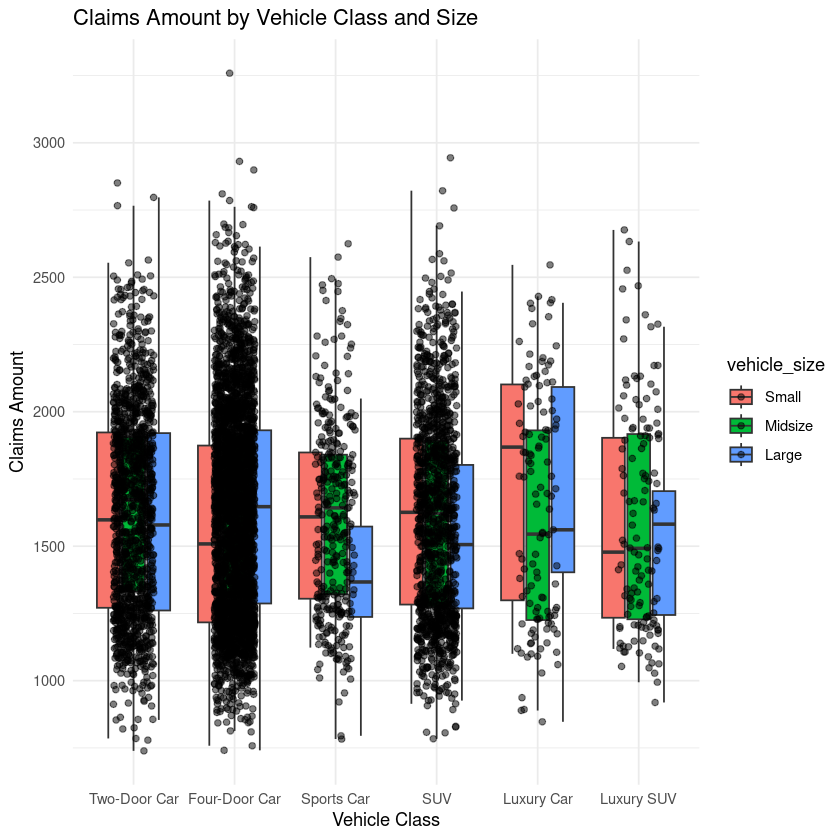

In [26]:


# Plot for claims frequency by vehicle class and size
ggplot(claims_summary, aes(x = vehicle_class, y = Claims_Frequency, fill = vehicle_size)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Claims Frequency by Vehicle Class and Size",
    x = "Vehicle Class",
    y = "Claims Frequency"
  ) +
  theme_minimal()

# Assuming you have the necessary detailed claims data for each claim
# Plot for claims amount by vehicle class and size
ggplot(claims_df, aes(x = vehicle_class, y = current_claim_amount, fill = vehicle_size)) +
  geom_boxplot(outlier.shape = NA) +  # Hide outliers for clarity
geom_jitter(width = 0.2, alpha = 0.5) +  # Add jittered points for individual claim amounts
  labs(
    title = "Claims Amount by Vehicle Class and Size",
    x = "Vehicle Class",
    y = "Claims Amount"
  ) +
  theme_minimal()


## Question 6


**Question**:
Does the sales channel impact the longevity or profitability of the customer relationship?


**Answer**:
All sales channels show a positive trend, meaning that as the months a policy is active increase, so does the CLV. This is an expected relationship since the longer a customer stays with the company, the more valuable they become. The slopes of the regression lines for each sales channel are positive, which suggests that no matter the sales channel, there is a positive relationship between the number of months a policy is active and the CLV. The regression lines for the different sales channels (Agent, Branch, Call Center, Web) seem to be close to each other, indicating that the sales channel may not have a significantly different impact on the relationship between policy longevity and CLV.
There doesn't appear to be a substantial difference in the slopes of the lines, suggesting that the effectiveness of the sales channel on CLV over time is relatively similar. The scatter plot shows a wide spread of CLV values for all sales channels, with a dense concentration of data points at the lower end of the CLV scale, which is typical in customer base analysis.
The spread and density of points do not seem to vary drastically between the different sales channels, which further suggests that sales channel does not have a significant differential impact on CLV.

## Supporting Analysis


In [27]:
# Summarize average months policy active and CLV by sales channel
sales_channel_summary <- claims_df %>%
  group_by(sales_channel) %>%
  summarise(
    Average_Months_Policy_Active = mean(months_policy_active, na.rm = TRUE),
    Average_CLV = mean(customer_lifetime_value, na.rm = TRUE)
  )

`geom_smooth()` using formula = 'y ~ x'


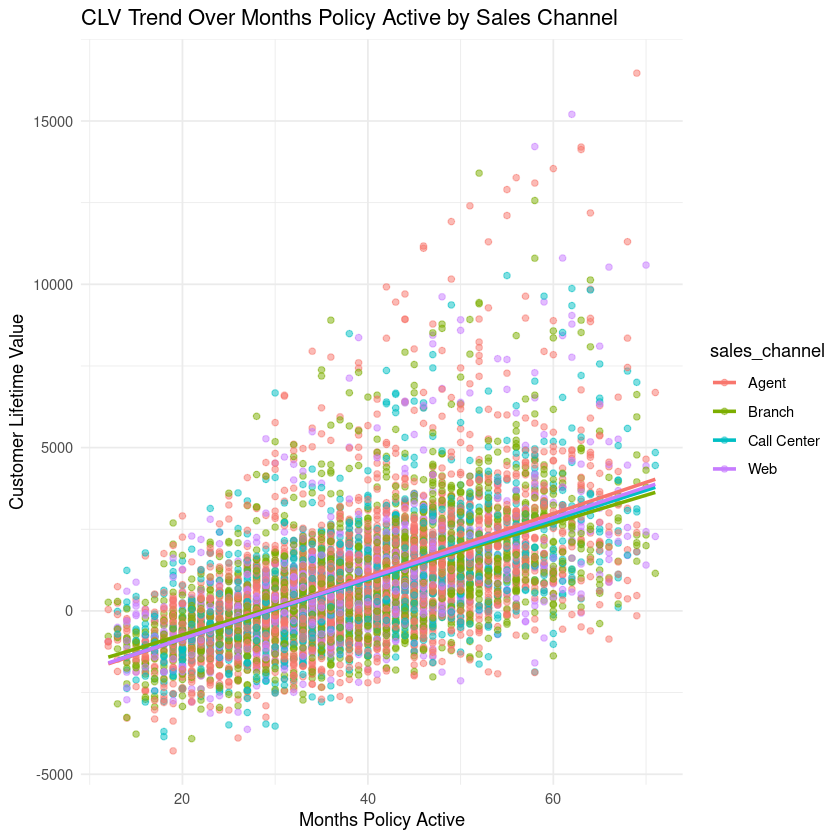

In [28]:
library(ggplot2)

# Scatter plot of CLV over months policy active by sales channel
ggplot(claims_df, aes(x = months_policy_active, y = customer_lifetime_value, color = sales_channel)) +
  geom_point(alpha = 0.5) +  # Use semi-transparent points to handle overplotting
  geom_smooth(method = "lm", se = FALSE) +  # Add a linear regression line
  theme_minimal() +
  labs(
    title = "CLV Trend Over Months Policy Active by Sales Channel",
    x = "Months Policy Active",
    y = "Customer Lifetime Value"
  )


## Question 7


**Question**:
 How do highest education level and employment status influence customer behavior and profitability?


**Answer**:
The data suggests that both education level and employment status are influential factors in customer behavior regarding insurance policy choices, which in turn affects profitability. Insurance companies could leverage this information to tailor their marketing and product offerings to different customer segments based on education and employment status.

## Supporting Analysis


In [29]:


# Summarize average CLV and monthly premium by highest education level and employment status
education_employment_summary <-claims_df %>%
  group_by(highest_education, employment_status) %>%
  summarise(
    Average_CLV = mean(customer_lifetime_value, na.rm = TRUE),
    Average_Monthly_Premium = mean(monthly_premium, na.rm = TRUE)
  )


`summarise()` has grouped output by 'highest_education'. You can override using
the `.groups` argument.


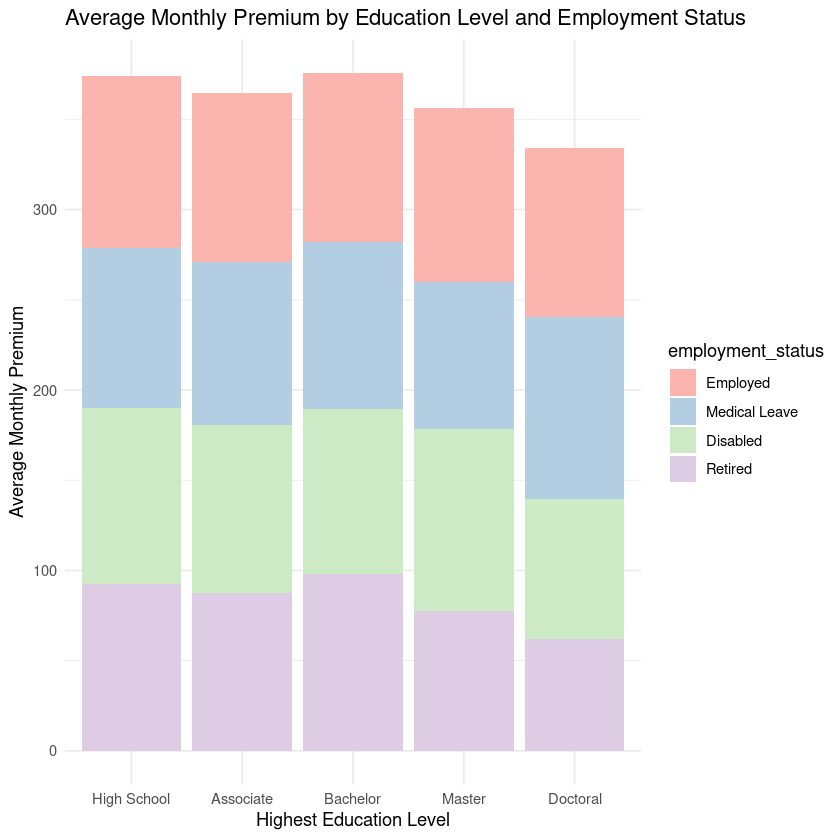

In [30]:
# Plot stacked bar chart
ggplot(education_employment_summary, aes(x = highest_education, y = Average_Monthly_Premium, fill = employment_status)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(
    title = "Average Monthly Premium by Education Level and Employment Status",
    x = "Highest Education Level",
    y = "Average Monthly Premium"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Pastel1")

## Question 8


**Question**:
 Is there a need to adjust premium rates based on the insights from claims data and customer profitability?


**Answer**:
**Plot 1: Relationship Between Average Premiums and Total Claims Amount by Policy Type**

The scatter plot shows that for the 'Personal' policy type, the total claims amount is the highest compared to 'special' and 'Corporate', despite having an average monthly premium that is not the highest. This could suggest that the 'personal' policies are underpriced relative to the risk they represent.
The 'special' policy has a lower total claims amount than 'Special' but a similar average monthly premium, which might indicate a more balanced relationship between premiums and claims.
The 'corparate' policy has the lowest total claims amount and a lower average monthly premium, which could suggest that it is priced appropriately or even that there is room to lower premiums to stay competitive, assuming the CLV remains high.

**Plot 2: Customer Lifetime Value in Relation to Claims to Premium Ratio**

The second plot depicts the CLV in relation to the claims to premium ratio. The 'Corporate' policy type has a higher average CLV and a lower claims to premium ratio, indicating a healthier profitability.
Conversely, the 'Special' policy type shows a higher claims to premium ratio and a lower CLV, which might indicate that customers with 'Special' policies are less profitable and the policy might be underpriced.
The 'Personal' policy type, while having the lowest CLV, also has a relatively low claims to premium ratio, suggesting that the profitability for 'Personal' policies might be stable.

## Supporting Analysis


In [39]:

# Assuming your data is in a data frame called claims_df and the column names are as referenced
# Calculate summary statistics and add Claims_to_Premium_Ratio
premium_claims_summary <- claims_df %>%
  group_by(policy) %>%
  summarise(
    Average_Premium = mean(monthly_premium, na.rm = TRUE),
    Total_Claims_Amount = sum(total_claims_amount, na.rm = TRUE),
    Average_CLV = mean(customer_lifetime_value, na.rm = TRUE),
    Count = n(),
    .groups = 'drop' # Drop the grouping for the summarised data
  ) %>%
  mutate(Claims_to_Premium_Ratio = Total_Claims_Amount / (Average_Premium * Count))

# Display the summary
premium_claims_summary


policy,Average_Premium,Total_Claims_Amount,Average_CLV,Count,Claims_to_Premium_Ratio
<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Personal,93.91026,12768996,923.6647,4658,29.19068
Corporate,93.55045,3649200,951.3238,1328,29.37336
Special,93.29278,734441,745.9582,263,29.93320


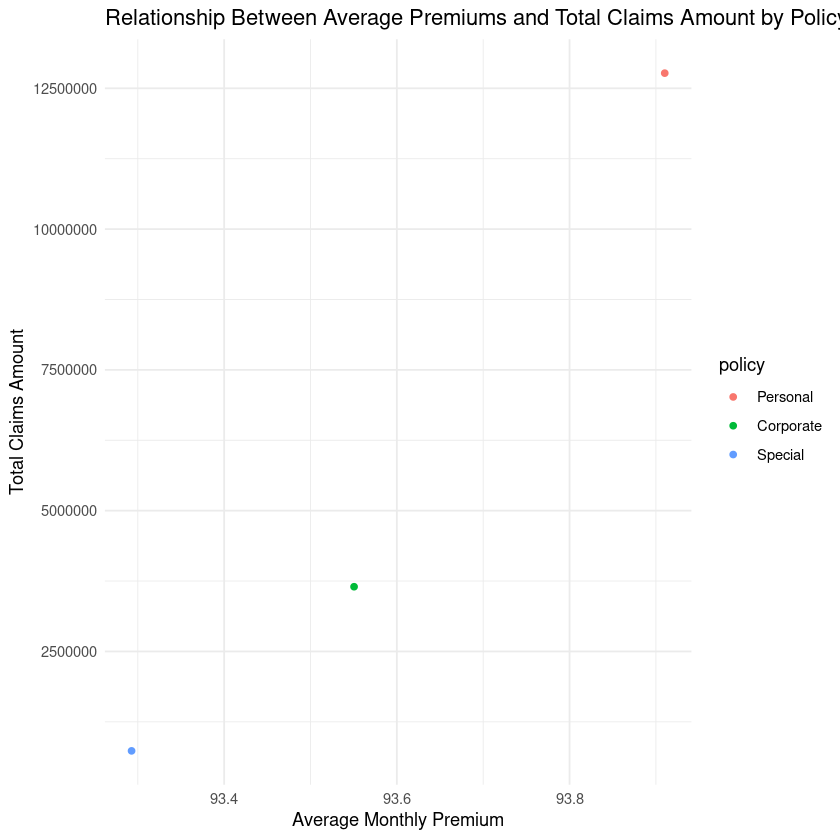

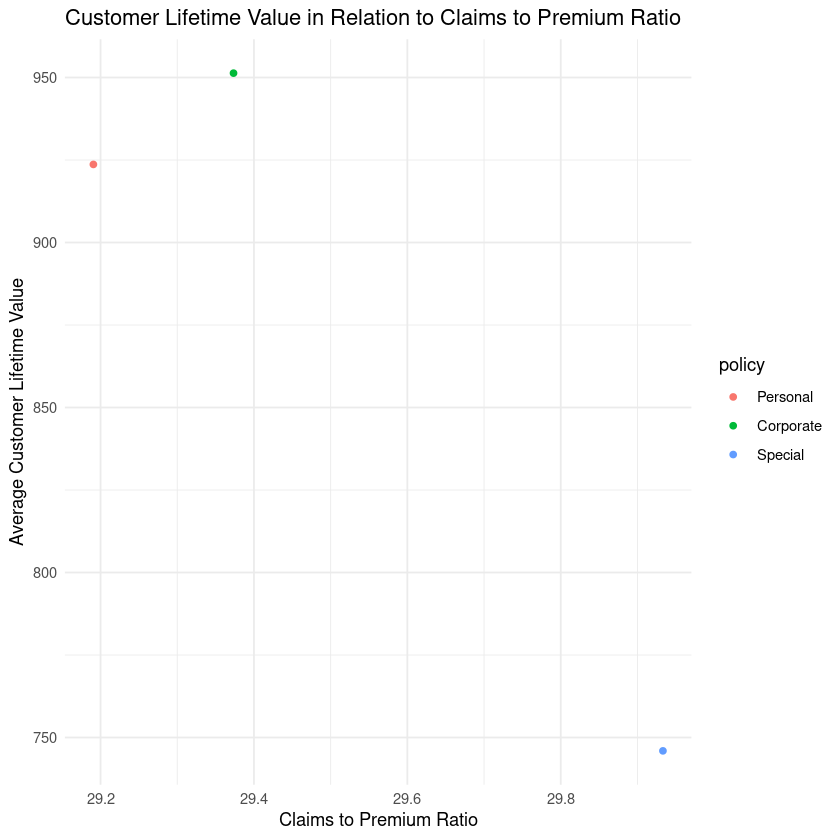

In [48]:

# Assuming premium_claims_clv_summary is your dataframe that contains the required columns
ggplot(premium_claims_summary, aes(x = Average_Premium, y = Total_Claims_Amount, color = policy)) +
  geom_point() +
  theme_minimal() +
  labs(
    title = "Relationship Between Average Premiums and Total Claims Amount by Policy Type",
    x = "Average Monthly Premium",
    y = "Total Claims Amount"
  )
# Visualize the CLV in relation to the claims to premium ratio
ggplot(premium_claims_summary, aes(x = Claims_to_Premium_Ratio, y = Average_CLV, color = policy)) +
  geom_point() +
  theme_minimal() +
  labs(
    title = "Customer Lifetime Value in Relation to Claims to Premium Ratio",
    x = "Claims to Premium Ratio",
    y = "Average Customer Lifetime Value"
  )

# Executive Summary (20 Points)

Write an executive summary of your overall findings and recommendations to the executives at this company. Think of this section as your closing remarks of a presentation, where you summarize your key findings and make recommendations to improve pricing, company operations, and car insurance policy adjustments.

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

<br>

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
	- Note: **Do not list all your questions and answers from the exploratory analysis section**. You should summarize the findings and list them in order by their potential business impact 
- This section is meant to **establish the need for your recommendations** in the following section

<br>

3.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add you executive summary in the text block below**.

## Introduction

The primary business problem under consideration involves optimizing pricing strategies and operational efficiency to enhance profitability and customer retention in the car insurance sector. With a highly competitive market, our client aims to refine their approach to risk assessment, pricing accuracy, and policy offerings to ensure financial stability and growth. The goal of our analysis was to identify patterns and correlations within the company's existing data that could inform more effective pricing models, identify profitable customer segments, and streamline operations.


## Key Findings
1. Gender and Marital Status Impact on Customer Lifetime Value (CLV): Female customers and single individuals demonstrate a higher average CLV, suggesting these demographics may warrant focused marketing efforts.
2. Policy Type and Tier Profitability: Corporate policies exhibit higher median CLVs across all tiers, with premium policies outperforming others. This indicates potential for increased profitability in targeting and expanding corporate customer segments.
3. Claims Analysis: A negative correlation exists between the total number of claims and CLV, particularly noticeable with 2-3 claims. Policies resulting in frequent small claims could be subject to revised terms to maintain profitability.
4. Sales Channel Efficiency: The positive trend in CLV over policy duration is consistent across all sales channels. This finding emphasizes the importance of customer retention strategies.
5. Education Level and Employment Status: These factors significantly influence policy choice and premium levels, highlighting opportunities for tailored product offerings.
6. Vehicle Class Risks: Four-door cars, especially midsize and large, have the highest claims frequency, while luxury SUVs have the lowest. This suggests that vehicle class should be a more significant factor in risk assessment.

## Recommendations
1. Targeted Marketing Initiatives: Develop targeted marketing strategies for female and single customers to leverage the higher average CLV in these demographics.
2. Corporate Focus: Aggressively market premium corporate policies, considering their higher median CLVs.
3. Claims Management: Review pricing models for policies with frequent claims, possibly introducing dynamic pricing or incentives for low-claim customers.
4. Retention Programs: Implement robust customer retention programs that encourage long-term policy renewals, as CLV increases with policy age across all sales channels.
5. Tailored Products: Offer customized insurance packages based on customer education and employment status to better match premium levels with risk profiles.
6. Risk-Based Pricing: Adjust premiums for four-door cars to reflect the higher claims frequency, ensuring that pricing is commensurate with risk.


**Business Impact**

These recommendations aim to enhance profitability by improving risk assessment and pricing accuracy. Focused marketing and retention strategies should boost CLV and reduce churn. Tailored products and risk-based pricing can lead to more satisfied customers and a more stable risk pool, promoting sustained business growth